In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl

In [2]:
data = pl.read_csv('./dataset/1.conversion/conversion_data.csv')

In [3]:
data.describe()

statistic,country,age,new_user,source,total_pages_visited,converted
str,str,f64,f64,str,f64,f64
"""count""","""316200""",316200.0,316200.0,"""316200""",316200.0,316200.0
"""null_count""","""0""",0.0,0.0,"""0""",0.0,0.0
"""mean""",null,30.569858,0.685465,null,4.872966,0.032258
"""std""",null,8.271802,0.464331,null,3.341104,0.176685
"""min""","""China""",17.0,0.0,"""Ads""",1.0,0.0
"""25%""",null,24.0,0.0,null,2.0,0.0
"""50%""",null,30.0,1.0,null,4.0,0.0
"""75%""",null,36.0,1.0,null,7.0,0.0
"""max""","""US""",123.0,1.0,"""Seo""",29.0,1.0


In [4]:
data.head()

country,age,new_user,source,total_pages_visited,converted
str,i64,i64,str,i64,i64
"""UK""",25,1,"""Ads""",1,0
"""US""",23,1,"""Seo""",5,0
"""US""",28,1,"""Seo""",4,0
"""China""",39,1,"""Seo""",5,0
"""US""",30,1,"""Seo""",6,0


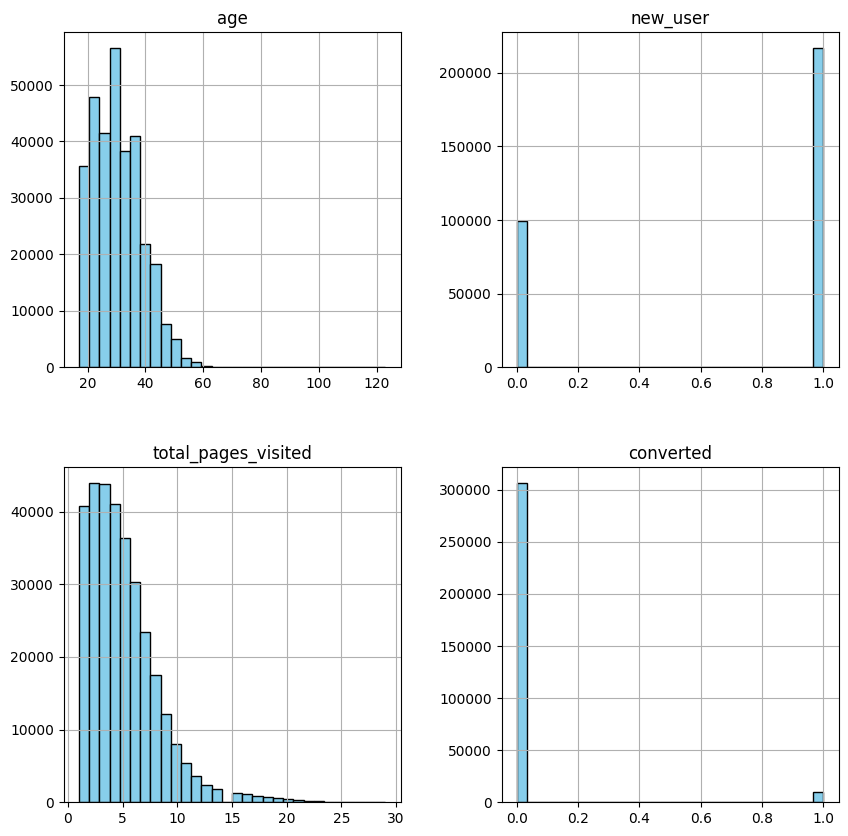

In [5]:
data.to_pandas().hist(bins=30, edgecolor='black', color='skyblue', figsize=(10, 10))
plt.show()

In [8]:
data_cor = data[['age', 'new_user', 'total_pages_visited', 'converted']]
corr = data_cor.corr()
corr

age,new_user,total_pages_visited,converted
f64,f64,f64,f64
1.0,0.012343,-0.045922,-0.088797
0.012343,1.0,-0.082541,-0.152374
-0.045922,-0.082541,1.0,0.528994
-0.088797,-0.152374,0.528994,1.0


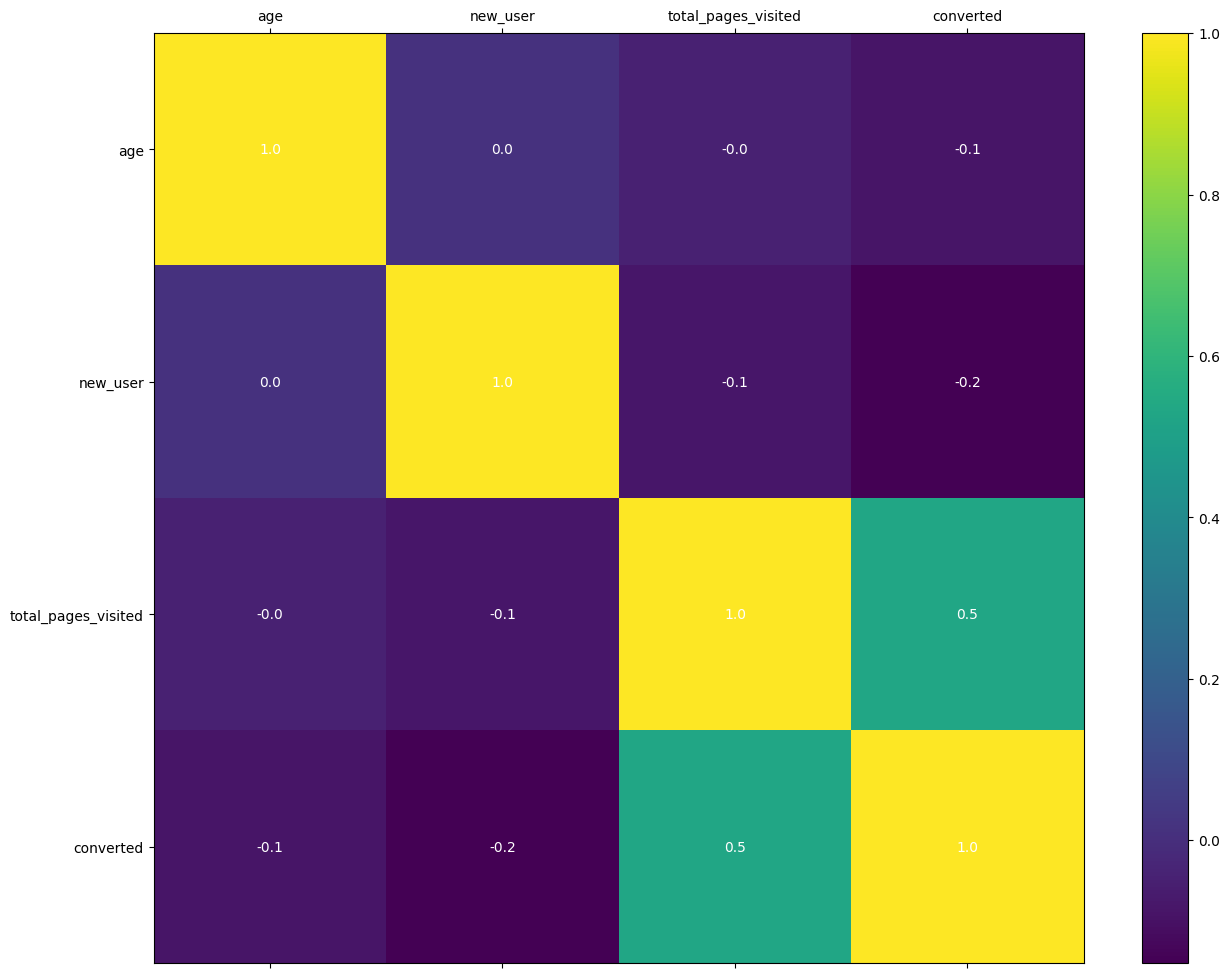

In [9]:
plt.figure(figsize=(15, 12))
plt.matshow(corr, fignum=1)
for (i, j), val in np.ndenumerate(corr):
    plt.text(j, i, '{:0.1f}'.format(val), ha='center', va='center', color='white')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

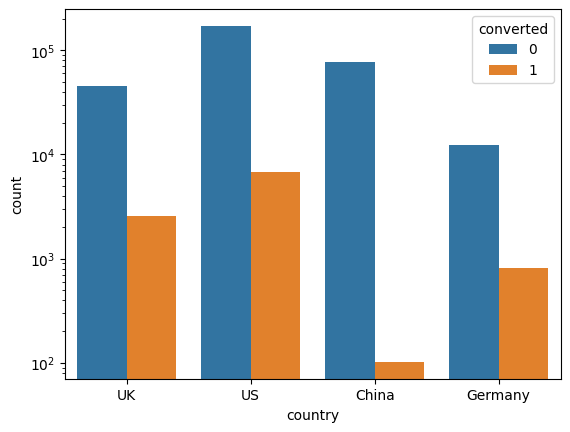

In [10]:
sns.countplot(x='country', hue='converted', data=data)
plt.yscale('log')

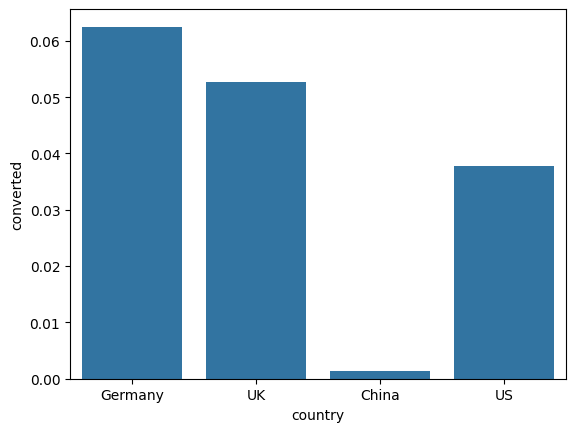

In [16]:
data_country = data.group_by('country').agg(pl.mean('converted'))
sns.barplot(x='country', y='converted', data=data_country);

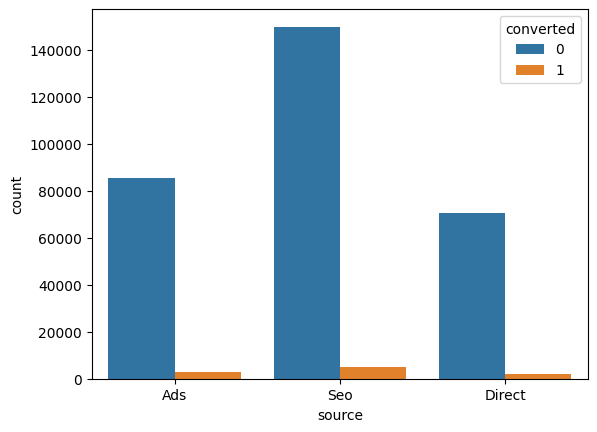

In [17]:
sns.countplot(x='source', hue='converted', data=data);

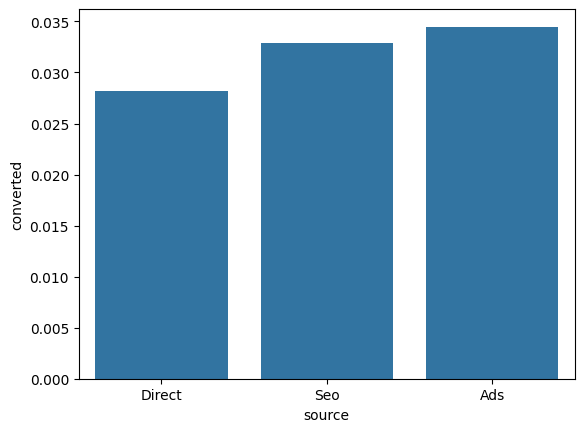

In [18]:
data_source = data.group_by('source').agg(pl.mean('converted'))
sns.barplot(x='source', y='converted', data=data_source);